# Задание 1

In [89]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm

## Входные данные

In [105]:
G = 6.67e-11  # гравитационная постоянная, м^3 кг^-1 с^-2
M1 = 2.0e30  # масса тела 1 (звезда), кг
M2 = 6.0e24  # масса тела 2 (планета), кг
M3 = 7.3e22  # масса астероида
R1 = 696340e3  # радиус солнца
R2 = 6378e3  # радиус тела 2 (планета), км
R12 = 150e9  # расстояние между телом 1 и телом 2, км
U2 = 30e3  # начальная скорость тела 2, км/с
R3 = 1737e3  # радиус тела 3 (астероид), км
R23 = 384e6  # расстояние между телом 2 и телом 3, км
U3 = 1.0e3  # начальная скорость тела 3, км/с

## Начальные условия

In [106]:
x1_0, y1_0 = 0, 0 # начальное положение солнца
vx1_0, vy1_0 = 0, 0 #начальная скорость солнца

x2_0 = R1 + R12 + R2  # начальное положение x тела 2
x3_0 = R1 + R12 + 2 * R2 + R23 + R3  # начальное положение x тела 3
y2_0 = 0  # начальное положение y тела 2
y3_0 = 0  # начальное положение y тела 3

vx2_0 = 0  # начальная скорость по x тела 2
vx3_0 = 0  # начальная скорость по x тела 3
vy2_0 = U2  # начальная скорость по y тела 2
vy3_0 = U3 + U2  # начальная скорость по y тела 3

In [107]:
# Определим систему уравнений
def system(t, state):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = state
    
    # Расстояния между телами
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    # r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    # r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    ax1 = G * M2 * (x2 - x1) / r12**3 
    ay1 = G * M2 * (y2 - y1) / r12**3 

    ax2 = G * M1 * (x1 - x2) / r12**3
    ay2 = G * M1 * (y1 - y2) / r12**3
    # Ускорения для каждого тела
    # ax1 = G * M2 * (x2 - x1) / r12**3 + G * M3 * (x3 - x1) / r13**3
    # ay1 = G * M2 * (y2 - y1) / r12**3 + G * M3 * (y3 - y1) / r13**3
    # 
    # ax2 = G * M1 * (x1 - x2) / r12**3 + G * M3 * (x3 - x2) / r23**3
    # ay2 = G * M1 * (y1 - y2) / r12**3 + G * M3 * (y3 - y2) / r23**3

    # ax3 = G * M1 * (x1 - x3) / r13**3 + G * M2 * (x2 - x3) / r23**3
    # ay3 = G * M1 * (y1 - y3) / r13**3 + G * M2 * (y2 - y3) / r23**3

    return [vx1, vy1, vx2, vy2, ax1, ay1, ax2, ay2]


In [108]:
# state0 = [x1_0,y1_0,x2_0,y2_0,x3_0,y3_0,vx1_0,vy1_0,vx2_0,vy2_0,vx3_0,vy3_0]

state0 = [x1_0,y1_0,x2_0,y2_0,vx1_0,vy1_0,vx2_0,vy2_0]

t_end = 60 * 60 * 24 * 684 * 100
n = 10000000

dt = t_end / n
dt

590.976

In [109]:
sol = solve_ivp(system, (0, t_end), state0, method='RK45', t_eval=np.linspace(0, t_end, n))
len(sol)

11

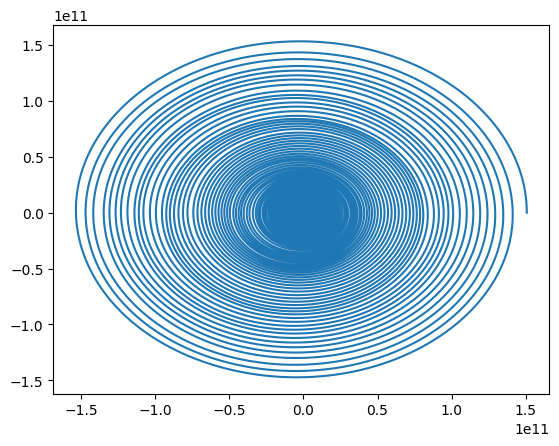

In [110]:
# plt.plot(sol.y[0], sol.y[1], label='Тело 1')
plt.plot(sol.state[2], sol.y[3], label='Тело 2')
# plt.plot(sol.y[4], sol.y[5], label='Тело 3')
# plt.legend()

# i = 0
# for start, end in [(200, 300), (5000, 5100)]:
#     i += 1;
#     plt.plot(sol.y[2][start * 1000:end * 1000], sol.y[3][start * 1000:end * 1000], label=f'Номер ветка: {i}')
#     plt.legend()
# plt.xlabel('x (м)')
# plt.ylabel('y (м)')
# plt.legend()
# plt.title('Траектории движения тел')
# plt.grid()
# plt.show()